## Import libraries

In [202]:
#! pip install category_encoders

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import category_encoders as ce
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [204]:
df= pd.read_csv("SongPopularity.csv")
df.head()

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
0,I Need You,I Need You,1/30/2001,['LeAnn Rimes'],"['country dawn', 'contemporary country', 'coun...",2000,44,229826,https://open.spotify.com/track/046MBhhgQJJghnb...,https://i.scdn.co/image/ab67616d00001e025cf523...,...,0.736,0.000096,0.118,-7.124,0.0367,144.705,0.564,7,1,4
1,Sweet Lady,Tyrese,8/31/1998,['Tyrese'],"['hip pop', 'contemporary r&b', 'urban contemp...",1999,43,290600,https://open.spotify.com/track/1Dx8rIZaXzZPvUQ...,https://i.scdn.co/image/ab67616d00001e0283422e...,...,0.522,0.000000,0.240,-6.254,0.0383,66.024,0.584,9,0,4
2,You Take My Breath Away - Mono Version,Sooner or Later,1979,['Rex Smith'],['bubblegum pop'],1979,86,197453,https://open.spotify.com/track/3BCMsz55asr7Yr6...,https://i.scdn.co/image/ab67616d00001e02d1741c...,...,0.600,0.000026,0.523,-7.913,0.0357,141.912,0.272,11,1,4
3,If I Give My Heart to You (with The Mellomen),Golden Girl (The Columbia Recordings 1944-1966),1945,"['Doris Day', 'The Mellomen']","['adult standards', 'easy listening', 'movie t...",1954,20,169066,https://open.spotify.com/track/20G1XJaTwIm2Iuw...,https://i.scdn.co/image/ab67616d00001e02f2ee02...,...,0.059,0.000000,0.103,-16.131,0.0497,76.642,0.331,9,1,4
4,Don't Forget About Us (As Made Famous By Maria...,Drew's Famous # 1 Karaoke Hits: Sing the Hits ...,8/16/2011,['The Karaoke Crew'],['karaoke'],2006,50,251013,https://open.spotify.com/track/28BSc2ZmO0Oe3iv...,https://i.scdn.co/image/ab67616d00001e02b0d3e3...,...,0.348,0.001280,0.247,-10.669,0.0545,143.595,0.385,7,0,4


## EDA and data preprocessing

In [205]:
df.shape

(6191, 24)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Song                 6191 non-null   object 
 1   Album                6191 non-null   object 
 2   Album Release Date   6191 non-null   object 
 3   Artist Names         6191 non-null   object 
 4   Artist(s) Genres     6191 non-null   object 
 5   Hot100 Ranking Year  6191 non-null   int64  
 6   Hot100 Rank          6191 non-null   int64  
 7   Song Length(ms)      6191 non-null   int64  
 8   Spotify Link         6191 non-null   object 
 9   Song Image           6191 non-null   object 
 10  Spotify URI          6191 non-null   object 
 11  Popularity           6191 non-null   int64  
 12  Acousticness         6191 non-null   float64
 13  Danceability         6191 non-null   float64
 14  Energy               6191 non-null   float64
 15  Instrumentalness     6191 non-null   f

In [207]:
df.isna().sum()

Song                   0
Album                  0
Album Release Date     0
Artist Names           0
Artist(s) Genres       0
Hot100 Ranking Year    0
Hot100 Rank            0
Song Length(ms)        0
Spotify Link           0
Song Image             0
Spotify URI            0
Popularity             0
Acousticness           0
Danceability           0
Energy                 0
Instrumentalness       0
Liveness               0
Loudness               0
Speechiness            0
Tempo                  0
Valence                0
Key                    0
Mode                   0
Time Signature         0
dtype: int64

* We don't have any missing values and that's great!

In [208]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hot100 Ranking Year,6191.0,1987.848167,20.354870,1946.000000,1971.00000,1988.000000,2005.000000,2022.000
Hot100 Rank,6191.0,48.320627,29.185349,1.000000,23.00000,47.000000,74.000000,100.000
Song Length(ms),6191.0,224626.535293,64360.369907,51800.000000,181759.50000,220734.000000,257113.000000,1561133.000
Popularity,6191.0,54.117913,21.511330,0.000000,42.00000,58.000000,70.000000,94.000
Acousticness,6191.0,0.300063,0.291133,0.000004,0.04925,0.195000,0.511500,0.995
Danceability,6191.0,0.617710,0.156799,0.000000,0.52050,0.633000,0.728000,0.988
Energy,6191.0,0.596881,0.205486,0.012000,0.45550,0.615000,0.758000,0.997
Instrumentalness,6191.0,0.045992,0.170713,0.000000,0.00000,0.000004,0.000523,0.972
Liveness,6191.0,0.180755,0.150009,0.015000,0.08720,0.123000,0.232000,0.985
Loudness,6191.0,-8.718824,3.774887,-37.841000,-11.12250,-8.128000,-5.787500,-0.810


##### We find:
* All of Loudness values are negative. Mode seems even more of a binary feature, and Time Signature and key even more of categoricals.

In [209]:
the_most_popular_songs = df[df['Popularity']>=90]
the_most_popular_songs.head()

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
214,As It Was,As It Was,3/31/2022,['Harry Styles'],['pop'],2022,2,167303,https://open.spotify.com/track/4LRPiXqCikLlN15...,https://i.scdn.co/image/ab67616d00001e02b46f74...,...,0.731,0.001010,0.3110,-5.338,0.0557,173.930,0.662,6,0,4
450,Starboy,Starboy,11/25/2016,"['The Weeknd', 'Daft Punk']","['rock', 'filter house', 'canadian pop', 'elec...",2016,58,230453,https://open.spotify.com/track/7MXVkk9YMctZqd1...,https://i.scdn.co/image/ab67616d00001e024718e2...,...,0.587,0.000006,0.1370,-7.015,0.2760,186.003,0.486,7,1,4
808,Someone You Loved,Divinely Uninspired To A Hellish Extent,5/17/2019,['Lewis Capaldi'],"['pop', 'uk pop']",2020,10,182160,https://open.spotify.com/track/7qEHsqek33rTcFN...,https://i.scdn.co/image/ab67616d00001e02fc2101...,...,0.405,0.000000,0.1050,-5.679,0.0319,109.891,0.446,1,1,4
1140,Heat Waves,Dreamland,8/7/2020,['Glass Animals'],"['pov: indie', 'modern rock', 'shiver pop', 'g...",2021,16,238805,https://open.spotify.com/track/3USxtqRwSYz57Ew...,https://i.scdn.co/image/ab67616d00001e02712701...,...,0.525,0.000007,0.0921,-6.900,0.0944,80.870,0.531,11,1,4
1215,Believer,Evolve,6/23/2017,['Imagine Dragons'],"['pop', 'rock', 'modern rock']",2018,100,204346,https://open.spotify.com/track/0pqnGHJpmpxLKif...,https://i.scdn.co/image/ab67616d00001e025675e8...,...,0.780,0.000000,0.0810,-4.374,0.1280,124.949,0.666,10,0,4


In [210]:
# Just 22 Songs has popularity score equal and greater than  90
the_most_popular_songs.shape

(22, 24)

In [211]:
the_least_popular_songs = df[df['Popularity'] <= 10]
the_least_popular_songs.head()

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
4,Don't Forget About Us (As Made Famous By Maria...,Drew's Famous # 1 Karaoke Hits: Sing the Hits ...,8/16/2011,['The Karaoke Crew'],['karaoke'],2006,50,251013,https://open.spotify.com/track/28BSc2ZmO0Oe3iv...,https://i.scdn.co/image/ab67616d00001e02b0d3e3...,...,0.348,0.001280,0.247,-10.669,0.0545,143.595,0.385,7,0,4
32,lately - Demo,lately (Demo),12/7/2022,['Divine Simisi'],[],1999,31,212509,https://open.spotify.com/track/0cv9WHEizHUkZAo...,https://i.scdn.co/image/ab67616d00001e025bfba4...,...,0.137,0.000000,0.381,-14.116,0.1770,85.299,0.205,0,1,3
36,It's Not Unusual/For The Love Of Him - Medley/...,It's Not Unusual/For The Love Of Him (Medley/L...,11/12/2021,['Bobbi Martin'],[],1970,77,87987,https://open.spotify.com/track/1hzRlAoXbslnQNq...,https://i.scdn.co/image/ab67616d00001e02041492...,...,0.495,0.000000,0.829,-11.936,0.0484,104.930,0.871,5,1,4
41,Master Blaster (Jammin'),BEST ROAD TRIP 80's Pop Hits,5/18/2023,['Stevie Wonder'],"['motown', 'soul']",1981,69,307933,https://open.spotify.com/track/300C0yuTNAQYZpJ...,https://i.scdn.co/image/ab67616d00001e028c90f0...,...,0.422,0.000395,0.182,-14.933,0.0546,131.105,0.970,10,0,4
47,Ain't Gonna Bump No More (With No Big Fat Woma...,1977 Karaoke Classics Volume 1,9/21/2009,['1970s Karaoke Band'],['karaoke'],1977,86,207960,https://open.spotify.com/track/0iuiShbEoKD6JSv...,https://i.scdn.co/image/ab67616d00001e02c6a108...,...,0.496,0.361000,0.327,-15.056,0.0539,113.099,0.880,2,1,4


* Oooh! We notice that we have some unknown values in Artist(s) Genres, so we should deal with that.

In [212]:
# There is a lot of non popular songs comparing with popular songs
the_least_popular_songs.shape

(398, 24)

In [213]:
df[df['Artist(s) Genres'] == '[]']

,Song,Album,Album Release Date,Artist Names,Artist(s) Genres,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Spotify Link,Song Image,...,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Key,Mode,Time Signature
21,Meet Me Halfway,Pov- you give me butterflies,1/31/2023,['The Black Eyed Peas'],[],2010,58,284386,https://open.spotify.com/track/2wgT2kmeRHkulsM...,https://i.scdn.co/image/ab67616d00001e02c9065a...,...,0.629,0.000039,0.3010,-6.844,0.0949,130.008,0.392,11,0,4
29,Washington Square,The Original Washington Square,11/26/1963,['The Village Stompers'],[],1963,75,162333,https://open.spotify.com/track/2JwLfiU13mnYuiq...,https://i.scdn.co/image/ab67616d00001e02810666...,...,0.301,0.140000,0.2140,-12.197,0.0464,119.916,0.769,4,0,4
32,lately - Demo,lately (Demo),12/7/2022,['Divine Simisi'],[],1999,31,212509,https://open.spotify.com/track/0cv9WHEizHUkZAo...,https://i.scdn.co/image/ab67616d00001e025bfba4...,...,0.137,0.000000,0.3810,-14.116,0.1770,85.299,0.205,0,1,3
36,It's Not Unusual/For The Love Of Him - Medley/...,It's Not Unusual/For The Love Of Him (Medley/L...,11/12/2021,['Bobbi Martin'],[],1970,77,87987,https://open.spotify.com/track/1hzRlAoXbslnQNq...,https://i.scdn.co/image/ab67616d00001e02041492...,...,0.495,0.000000,0.8290,-11.936,0.0484,104.930,0.871,5,1,4
46,Are You Jimmy Ray?,Jimmy Ray,3/10/1998,['Jimmy Ray'],[],1998,65,201200,https://open.spotify.com/track/6VWFrHAnLDyNUEJ...,https://i.scdn.co/image/ab67616d00001e02d0929f...,...,0.914,0.000023,0.3920,-5.707,0.0704,99.083,0.673,10,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,Forever - Single Version,Forever,6/8/1968,['The Little Dippers'],[],1960,61,143160,https://open.spotify.com/track/5rWyKJMaTXL0TAr...,https://i.scdn.co/image/ab67616d00001e025ac908...,...,0.450,0.000006,0.1520,-9.133,0.0244,72.115,0.549,5,1,4
6145,Good Morning Starshine,The Dish (Music From The Motion Picture),1/1/2001,['Oliver'],[],1969,43,221133,https://open.spotify.com/track/0XoTz3HTFkhyji6...,https://i.scdn.co/image/ab67616d00001e023eb155...,...,0.541,0.000013,0.0525,-7.910,0.0288,125.012,0.862,11,1,4
6152,The Lion Sleeps Tonight,Atlantic Records 40th Anniversary: Hit Singles...,1988,['Robert John'],[],1972,21,153706,https://open.spotify.com/track/79fwgYi0nxAn2Zd...,https://i.scdn.co/image/ab67616d00001e0217997d...,...,0.377,0.000002,0.1030,-12.179,0.0358,128.523,0.900,5,1,4
6159,I Know There's Something Going On,Something's Going On,9/6/1982,['Frida'],[],1983,20,326746,https://open.spotify.com/track/6CT0MVgHnoAUXrS...,https://i.scdn.co/image/ab67616d00001e0232fb3a...,...,0.795,0.291000,0.0834,-8.269,0.0358,109.011,0.865,2,0,4


In [214]:
df['Artist(s) Genres'].nunique()

2231

* As we see there are just 2231 unique values out of 6191 entries with 394 empty values in
 'Artist(s) Genres' column so we will fill this empty values with mode.

In [215]:
df['Artist(s) Genres'].mode()[0]     

'[]'

In [216]:
df['Artist(s) Genres'].value_counts()

[]                                                                                                                             394
['karaoke']                                                                                                                    120
['pop']                                                                                                                         99
['pop', 'dance pop']                                                                                                            71
['deep adult standards']                                                                                                        47
                                                                                                                              ... 
['vocal harmony group', 'adult standards', 'easy listening', 'light music', 'lounge']                                            1
['outlaw country', 'chattanooga indie']                                            

In [217]:
second_mode = df['Artist(s) Genres'].value_counts().index[1]
second_mode

"['karaoke']"

In [218]:
df['Artist(s) Genres'] = df['Artist(s) Genres'].apply(lambda x: second_mode  if x == '[]' else x)

In [219]:
df['Artist(s) Genres'].value_counts()

['karaoke']                                                                                                                    514
['pop']                                                                                                                         99
['pop', 'dance pop']                                                                                                            71
['deep adult standards']                                                                                                        47
['dance pop', 'pop']                                                                                                            46
                                                                                                                              ... 
['vocal harmony group', 'adult standards', 'easy listening', 'light music', 'lounge']                                            1
['outlaw country', 'chattanooga indie']                                            

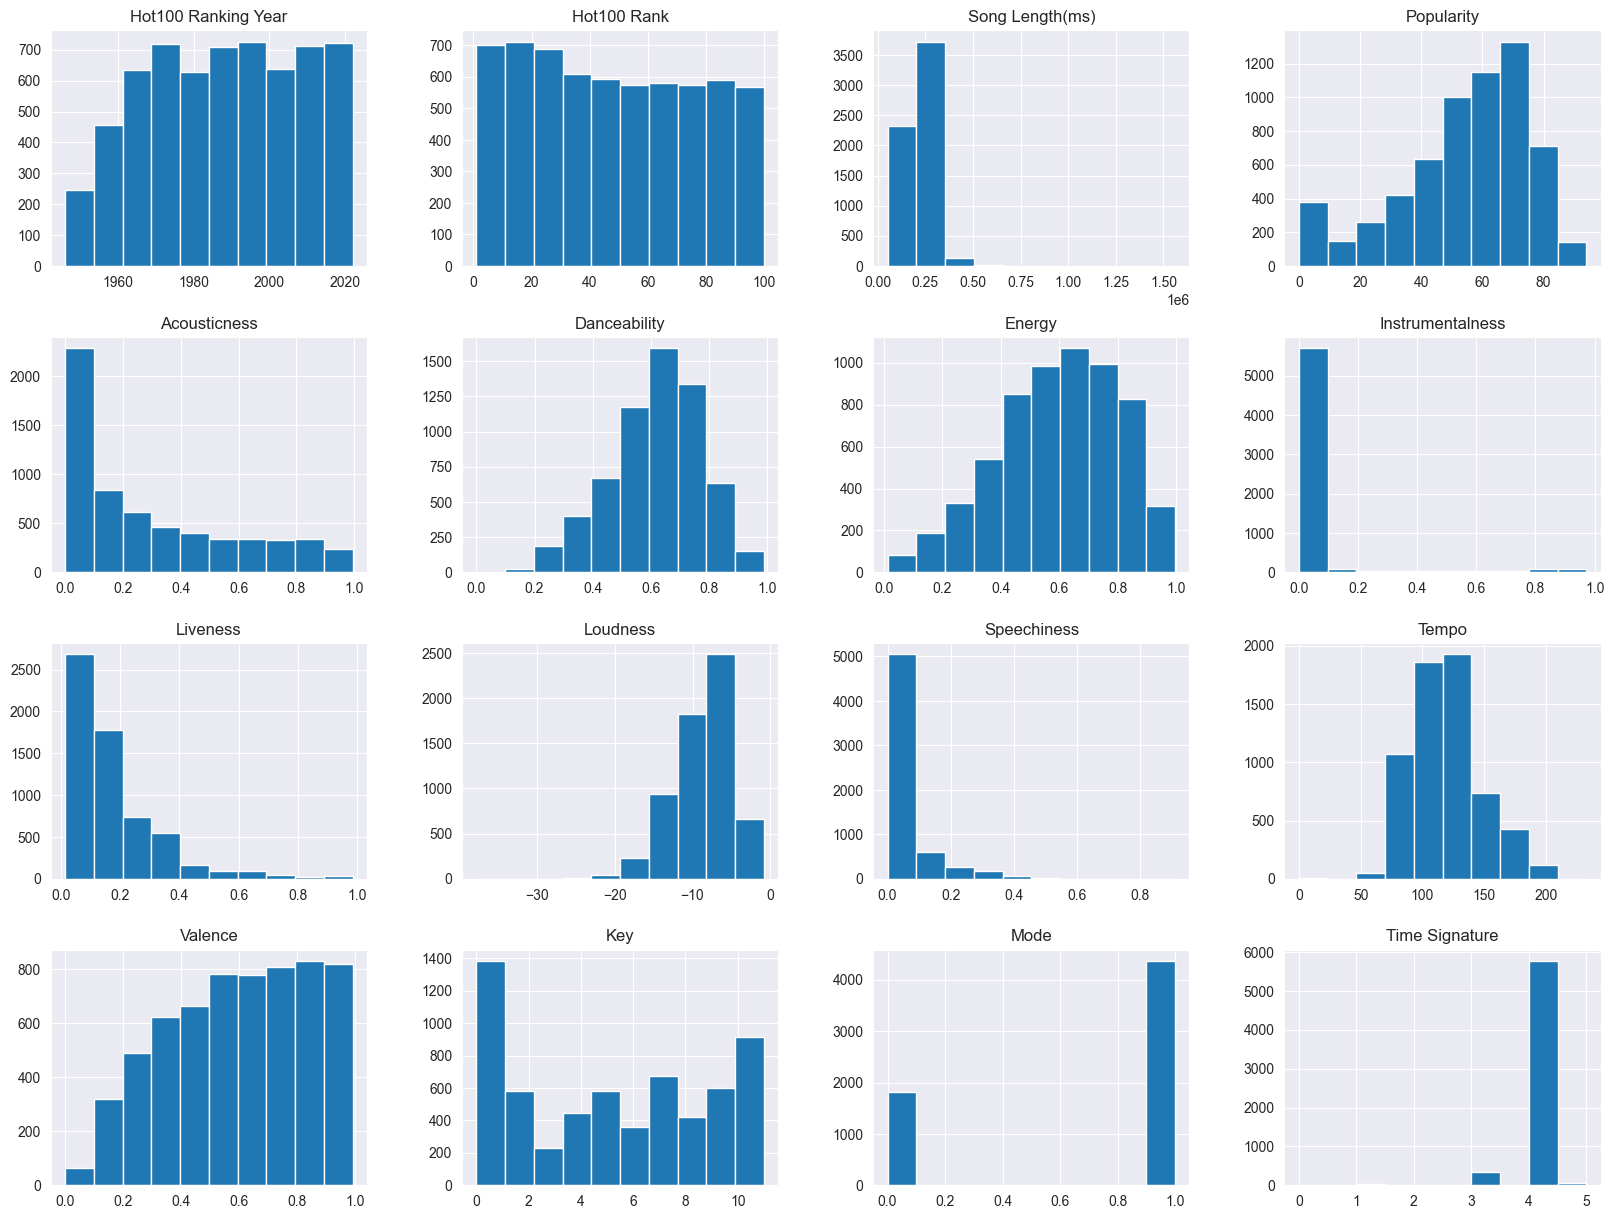

In [220]:
df.hist(figsize=(20,15))
plt.show()

#### We find from this graph:
* Song Length (ms): Most songs have a length that falls within a certain range, with a peak around 
200,000 to 300,000 milliseconds (or 3 to 5 minutes), which is typical for popular music tracks.
* Acousticness : The majority of songs have low acousticness, with a peak near 0.
* Danceability : The distribution is skewed towards higher danceability, with a peak around 
0.6 to 0.7 .This indicates that songs in the dataset are generally suitable for dancing.
* Energy : The distribution has a peak around 0.6 to 0.8, suggesting that many songs have a moderate to high level of energy.
* Instrumentalness : There is a high peak near 0, indicating that most songs have very low instrumentalness, which means they likely contain vocal content.
* Loudness : The distribution is skewed towards higher loudness levels, with most songs being around -5 to -10 dB. This reflects the modern trend of producing louder tracks.
* Speechiness : Most songs have low speechiness, with a peak near 0. This indicates that spoken words (e.g. talk show, audio book, poetry) are not a dominant feature.
* Tempo : The distribution shows a concentration of songs with tempos around 100 to 150 beats per minute (BPM), which is common for pop and dance music.
* Time Signature : The vast majority of songs have a 4/4 time signature, which is the most common time signature in Western music.

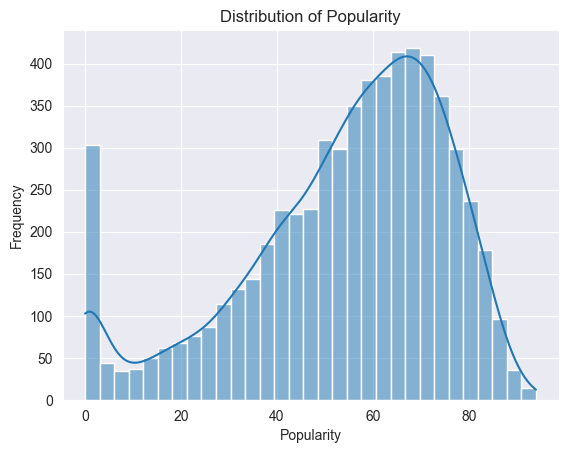

In [221]:
sns.histplot(data=df['Popularity'], kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

* This graph shows that the song popularity is almost normal distribution, although there is a right-skewed distribution, indicating that fewer songs have very high popularity scores. This could suggest that only a small number of songs achieve extremely high popularity

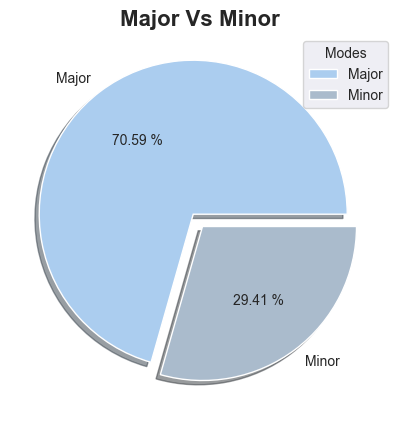

In [222]:
plt.figure(figsize=(5, 5))
Major = df.loc[df['Mode'] == 1].count()[0]
Minor = df.loc[df['Mode'] == 0].count()[0]

labels = ['Major', 'Minor']
colors = ['#abcdef', '#aabbcc']
explode = (0.1, 0)

plt.pie([Major, Minor], labels=labels, colors=colors, autopct='%.2f %%', shadow=True, explode=explode)
plt.title('Major Vs Minor ', fontsize=16, fontweight='bold')

plt.legend(title='Modes', loc='best')

plt.show()

#### We notice :
* There is a preference for songs in a major key (mode 1) over a minor key (mode 0), which is typical as major keys are often associated with happier, more upbeat music.

In [223]:
def plot(variable):

    var = df[variable]
    
    varValue = var.value_counts()

    plt.figure(figsize =(6,4))
    sns.countplot(data=df,x=variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

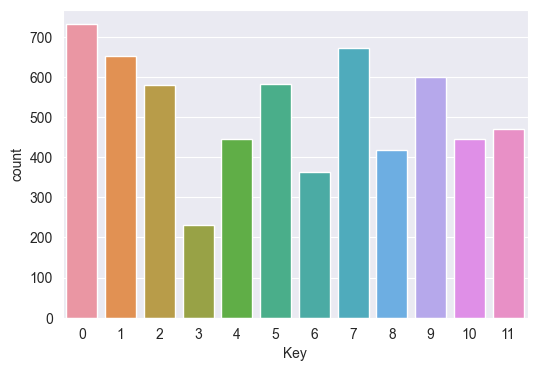

Key: 
 0     731
7     671
1     653
9     600
5     583
2     580
11    470
4     446
10    445
8     419
6     362
3     231
Name: Key, dtype: int64
None


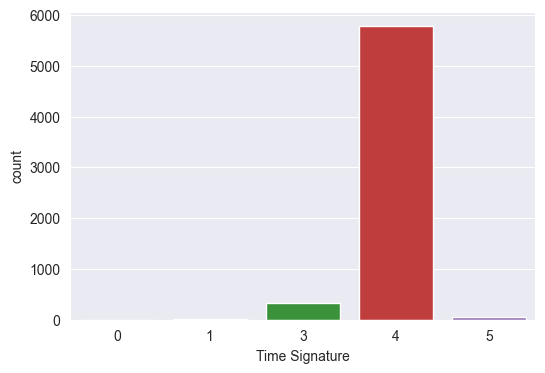

Time Signature: 
 4    5775
3     337
5      53
1      23
0       3
Name: Time Signature, dtype: int64
None


In [224]:
columns= ['Key', 'Time Signature']
for i in columns:
    print(plot(i))

Text(0.5, 1.0, 'Popularity Based on Key')

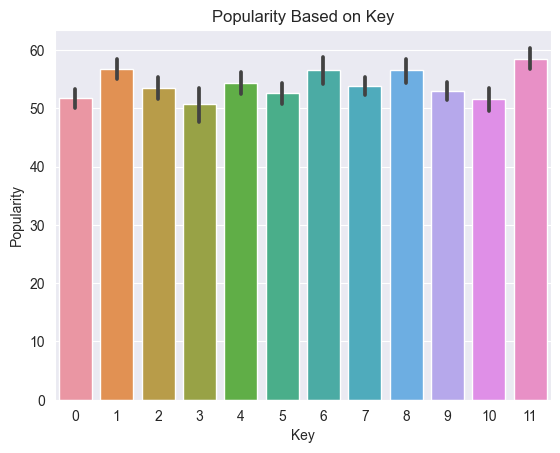

In [225]:
sns.barplot(x = 'Key', y = 'Popularity', data = df)
plt.title('Popularity Based on Key')

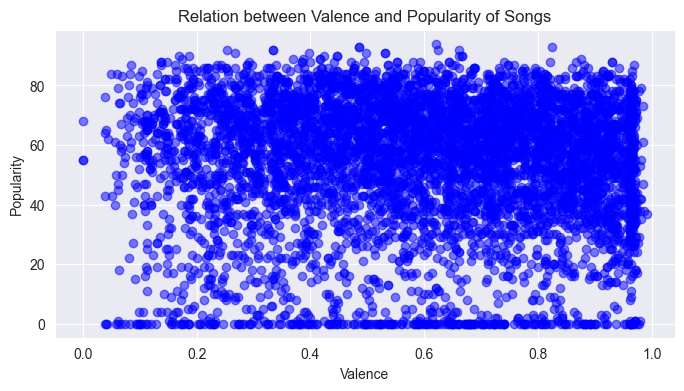

In [226]:
plt.figure(figsize=(8, 4))
plt.scatter(df['Valence'], df['Popularity'], alpha=0.5, color='b')
plt.title('Relation between Valence and Popularity of Songs')
plt.xlabel('Valence')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

#### We find from this graph:
* Concentration of blue dots in the upper right quadrant implys that songs with higher valence are more likely to be popular among listeners. On the other hand, songs with lower valence may have lower popularity.

In [227]:
df['Album Release Date'] = pd.to_datetime(df['Album Release Date'])

In [228]:
df['Album Release Date'].dtype

dtype('<M8[ns]')

In [229]:
df['Album Release Date']

0      2001-01-30
1      1998-08-31
2      1979-01-01
3      1945-01-01
4      2011-08-16
          ...    
6186   1990-04-09
6187   2005-01-01
6188   2005-11-21
6189   2007-07-03
6190   1998-01-01
Name: Album Release Date, Length: 6191, dtype: datetime64[ns]

In [230]:
df['Album Release Year'] = pd.DatetimeIndex(df['Album Release Date']).year

In [231]:
df['Album Release Year'].head()

0    2001
1    1998
2    1979
3    1945
4    2011
Name: Album Release Year, dtype: int64

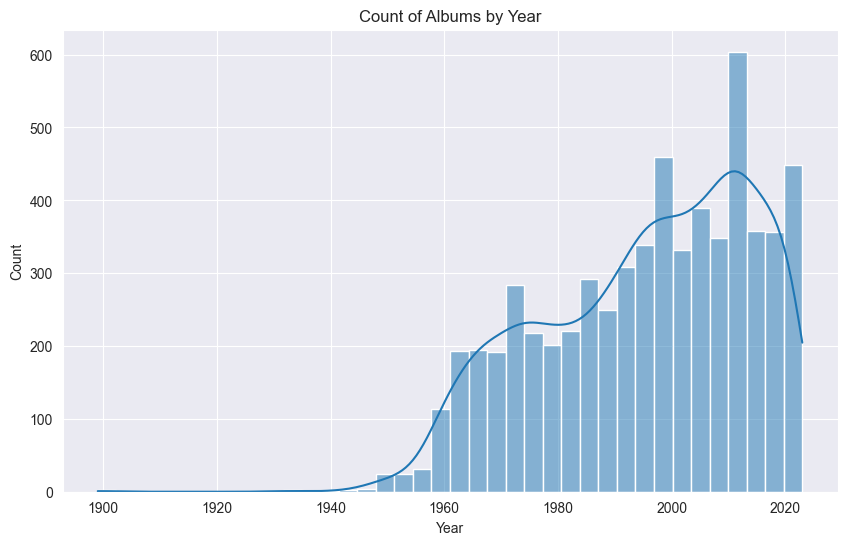

In [232]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df['Album Release Year'], kde=True)
plt.title('Count of Albums by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks()
plt.yticks()
plt.show()

#### We find:
* the most number of albums released between 2000 to 2020.

In [233]:
songs_per_album = df['Album'].value_counts().head(15)
songs_per_album_df = songs_per_album.reset_index()
songs_per_album_df.columns = ['album', 'count']
songs_per_album_df

,album,count
0,Greatest Hits,48
1,Super Hits,13
2,16 Most Requested Songs,10
3,The Definitive Collection,10
4,Celebration (double disc version),9
5,Golden Hits,8
6,Love Songs,8
7,Faith,8
8,Pat Boone's Greatest Hits (Reissue),7
9,Rhythm Nation 1814,7


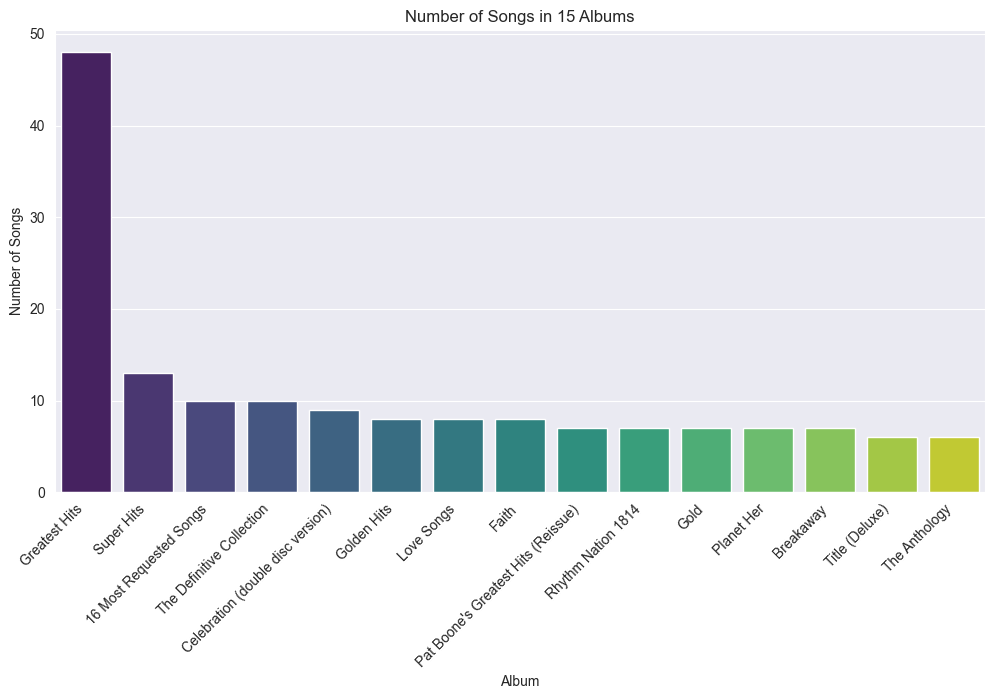

In [234]:
plt.figure(figsize=(12, 6))
sns.barplot(x='album', y='count', data=songs_per_album_df, palette='viridis')
plt.xlabel('Album')
plt.ylabel('Number of Songs')
plt.title('Number of Songs in 15 Albums')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## Encoding : Target Encoding (Mean Encoding)

In [235]:
# Prefere to do that after splitting the data
# Initialize the MeanEncoder
mean_encoder = ce.TargetEncoder()

# Fit the encoder shoud on the training data
mean_encoder.fit(df[['Song Image', 'Album','Artist Names','Artist(s) Genres']], df['Popularity'])

df_encoded = mean_encoder.transform(df[['Song Image', 'Album','Artist Names','Artist(s) Genres']])

In [236]:
df.drop(['Song Image', 'Album','Artist Names','Artist(s) Genres'],axis=1, inplace=True)

In [237]:
df = df.join(df_encoded)

In [238]:
print(df['Spotify Link'].nunique())
print(df['Spotify URI'].nunique())
print(df['Song'].nunique())

5918
5918
5694


* (Song), (Spotify Link) and (Spotify URI) columns have alot of unique values and will not help us 
* in predicting the popularity of the song (hard to finf pattern) so we will drop them.
* (Album Release Date) we will not need it aany more as we extract the fromit the Album Release year

In [239]:
df.drop(['Song','Spotify Link','Spotify URI', 'Album Release Date'],axis=1, inplace=True)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hot100 Ranking Year  6191 non-null   int64  
 1   Hot100 Rank          6191 non-null   int64  
 2   Song Length(ms)      6191 non-null   int64  
 3   Popularity           6191 non-null   int64  
 4   Acousticness         6191 non-null   float64
 5   Danceability         6191 non-null   float64
 6   Energy               6191 non-null   float64
 7   Instrumentalness     6191 non-null   float64
 8   Liveness             6191 non-null   float64
 9   Loudness             6191 non-null   float64
 10  Speechiness          6191 non-null   float64
 11  Tempo                6191 non-null   float64
 12  Valence              6191 non-null   float64
 13  Key                  6191 non-null   int64  
 14  Mode                 6191 non-null   int64  
 15  Time Signature       6191 non-null   i

## Feature Scaling

In [241]:
df.describe()

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,...,Tempo,Valence,Key,Mode,Time Signature,Album Release Year,Song Image,Album,Artist Names,Artist(s) Genres
count,6191.000000,6191.000000,6.191000e+03,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,...,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000,6191.000000
mean,1987.848167,48.320627,2.246265e+05,54.117913,0.300063,0.617710,0.596881,0.045992,0.180755,-8.718824,...,119.009198,0.596321,5.240833,0.705863,3.941043,1995.444839,54.162728,54.095178,53.982864,52.208674
std,20.354870,29.185349,6.436037e+04,21.511330,0.291133,0.156799,0.205486,0.170713,0.150009,3.774887,...,28.224417,0.242167,3.581859,0.455690,0.317370,18.439365,2.939605,3.036995,5.676972,10.689217
min,1946.000000,1.000000,5.180000e+04,0.000000,0.000004,0.000000,0.012000,0.000000,0.015000,-37.841000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1899.000000,45.027099,45.027099,5.977020,21.838521
25%,1971.000000,23.000000,1.817595e+05,42.000000,0.049250,0.520500,0.455500,0.000000,0.087200,-11.122500,...,97.851000,0.404000,2.000000,0.000000,4.000000,1981.000000,52.544276,52.540825,52.541270,52.040163
50%,1988.000000,47.000000,2.207340e+05,58.000000,0.195000,0.633000,0.615000,0.000004,0.123000,-8.128000,...,117.907000,0.613000,5.000000,1.000000,4.000000,1998.000000,54.739517,54.739517,54.668591,54.728037
75%,2005.000000,74.000000,2.571130e+05,70.000000,0.511500,0.728000,0.758000,0.000523,0.232000,-5.787500,...,134.905000,0.804000,8.000000,1.000000,4.000000,2011.000000,56.314416,56.314416,56.567289,56.796357
max,2022.000000,100.000000,1.561133e+06,94.000000,0.995000,0.988000,0.997000,0.972000,0.985000,-0.810000,...,232.473000,0.991000,11.000000,1.000000,5.000000,2023.000000,60.490642,60.490642,69.431712,77.567064


In [242]:
feature_to_scale = ['Song Length(ms)','Tempo','Album Release Year']

scaler = StandardScaler()
df[feature_to_scale] = scaler.fit_transform(df[feature_to_scale])
df.head(3)

,Hot100 Ranking Year,Hot100 Rank,Song Length(ms),Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,...,Tempo,Valence,Key,Mode,Time Signature,Album Release Year,Song Image,Album,Artist Names,Artist(s) Genres
0,2000,44,0.080793,62,0.020,0.478,0.736,0.000096,0.118,-7.124,...,0.910484,0.564,7,1,4,0.301291,55.803400,55.803400,55.701747,55.249448
1,1999,43,1.025146,63,0.233,0.588,0.522,0.000000,0.240,-6.254,...,-1.877434,0.584,9,0,4,0.138582,55.273548,55.273548,55.448772,58.626700
2,1979,86,-0.422243,49,0.476,0.313,0.600,0.000026,0.523,-7.913,...,0.811519,0.272,11,1,4,-0.891905,53.452029,53.452029,53.452029,43.027783


## Detecting and Removing Outliers

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxen_plots(df, columns):
    num_plots = len(columns)
    num_cols = 2
    num_rows = -(-num_plots // num_cols)  # Ceiling division to determine the number of rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows))

    for i, col in enumerate(columns):
        row = i // num_cols
        col_idx = i % num_cols

        if num_rows == 1:
            ax = axes[col_idx]
        else:
            ax = axes[row, col_idx]

        sns.boxenplot(x=col, data=df, ax=ax)
        ax.set_title(f'Boxen Plot of {col}')
    
    plt.tight_layout()
    plt.show()

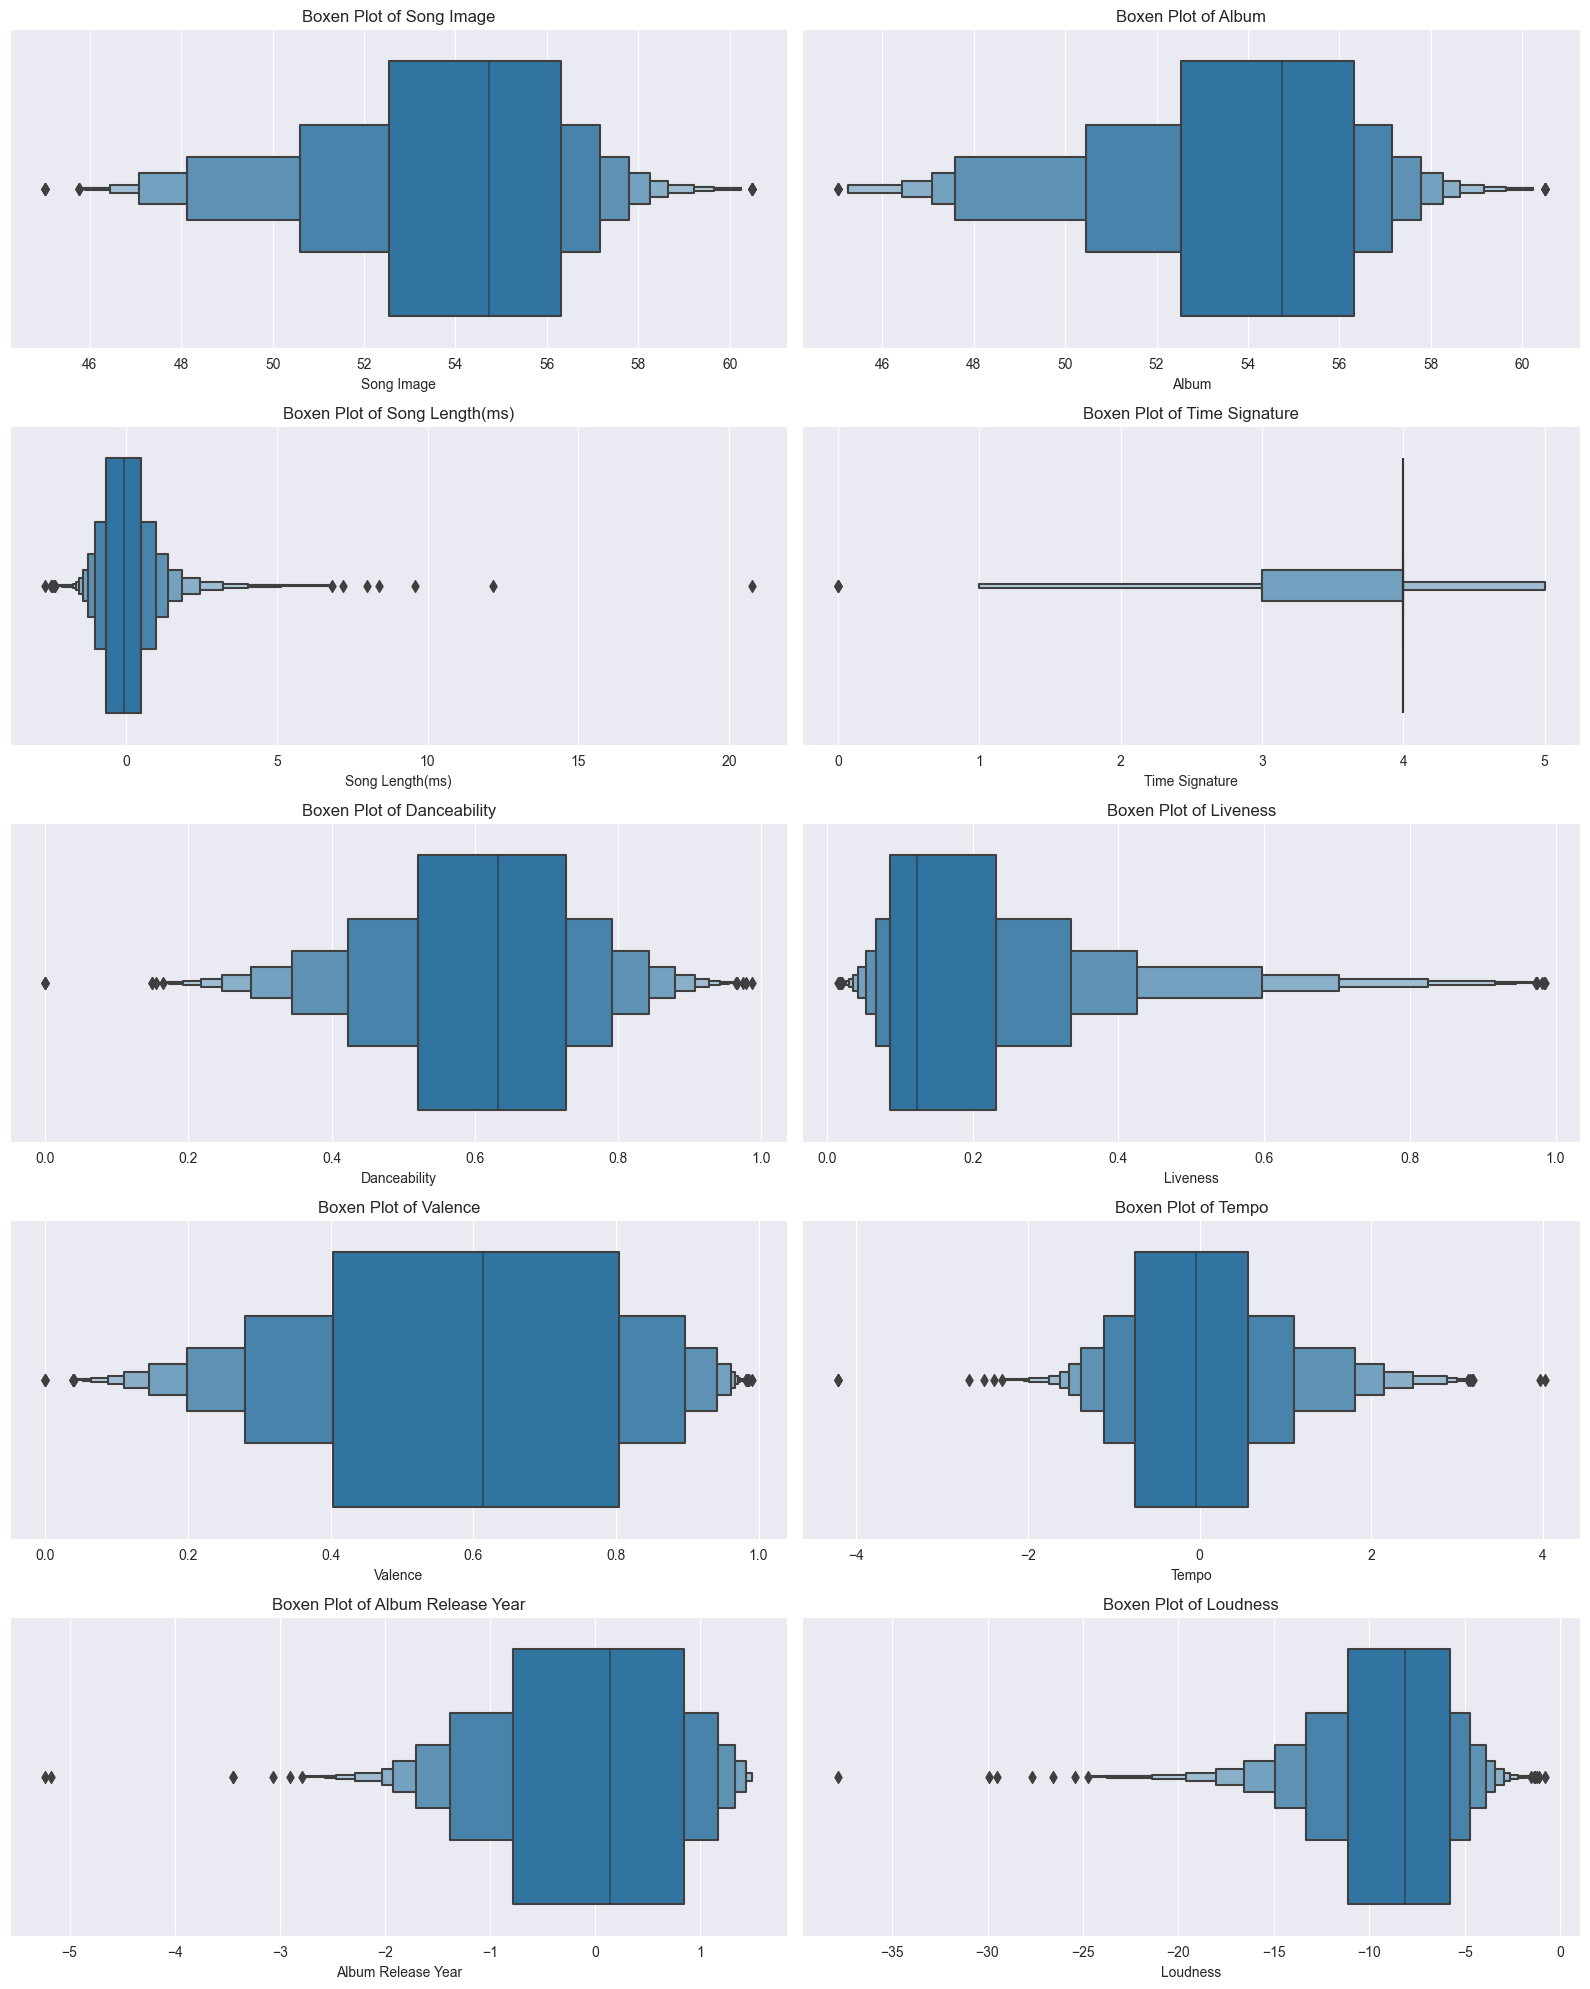

In [244]:
columns = ['Song Image', 'Album', 'Song Length(ms)','Time Signature','Danceability',
           'Liveness','Valence','Tempo','Album Release Year','Loudness']
plot_boxen_plots(df, columns)

* As we see There are some outliers so we should deal with them.

In [245]:
def remove_outliers_zScore(df, columns, threshold=3):
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())
    outliers = df[(z_scores > threshold).any(axis=1)]
    cleaned_df = df[(z_scores <= threshold).all(axis=1)]
    
    return cleaned_df, outliers

In [246]:
cleand_data, outliers =remove_outliers_zScore(df,columns)
cleand_data.shape

(5828, 21)

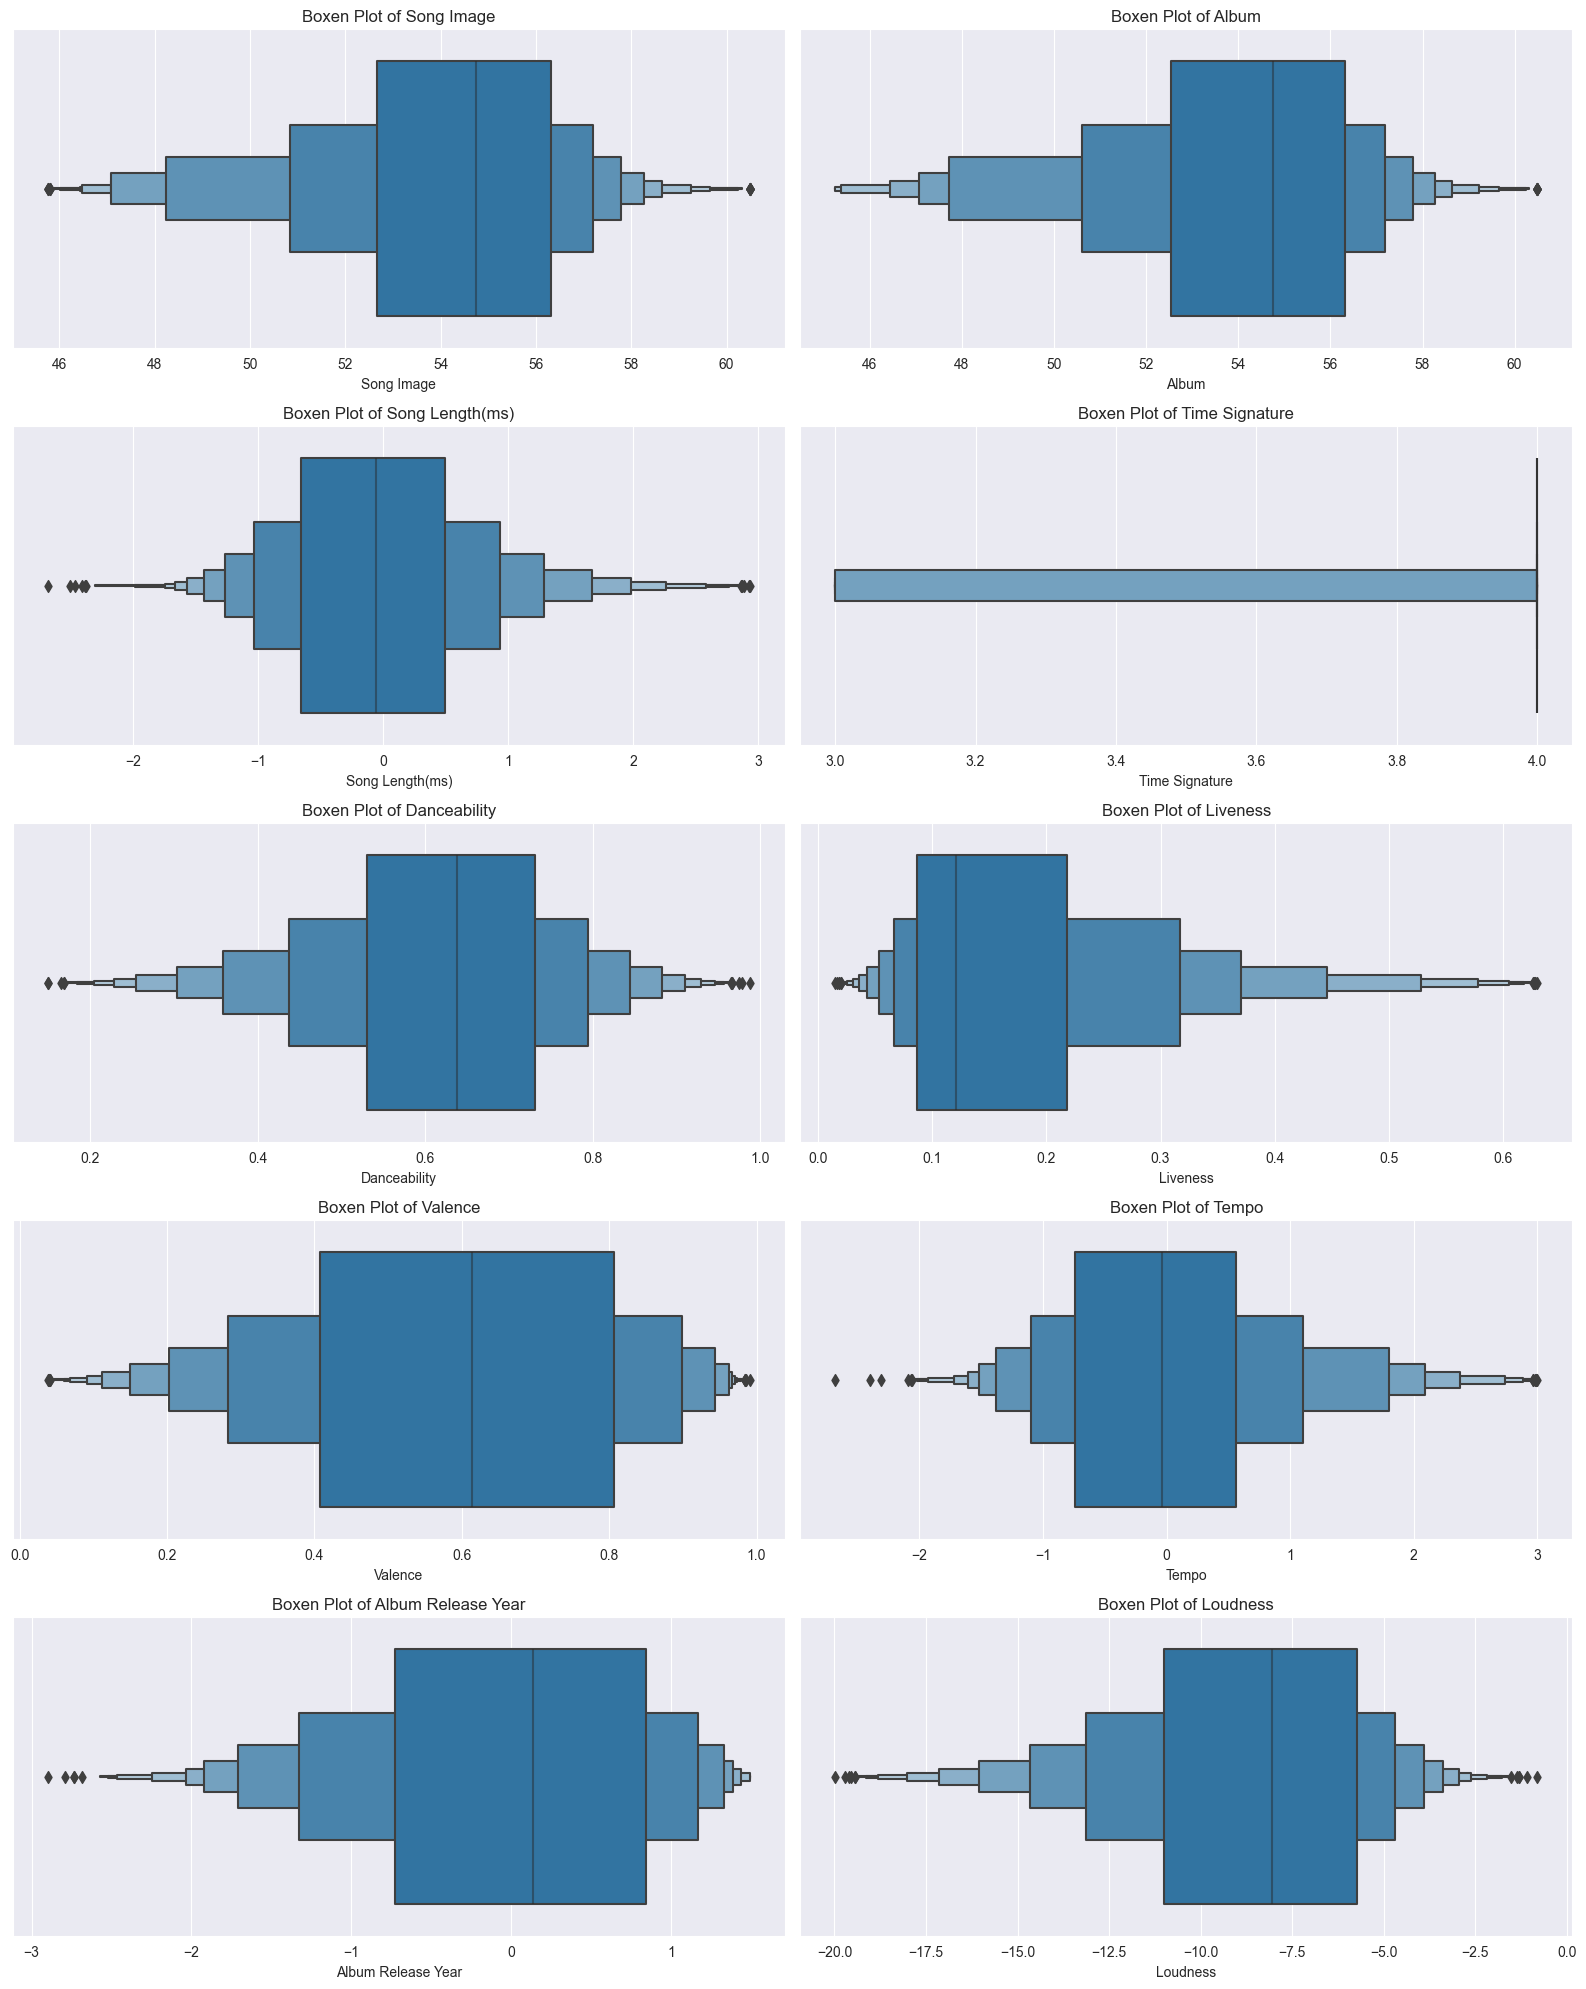

In [247]:
columns = ['Song Image', 'Album', 'Song Length(ms)','Time Signature','Danceability',
           'Liveness','Valence','Tempo','Album Release Year','Loudness']
plot_boxen_plots(cleand_data, columns)

In [248]:
def remove_outliers_IQR(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [249]:
cleand_df = remove_outliers_IQR(df,columns)
cleand_df.shape

(5076, 21)

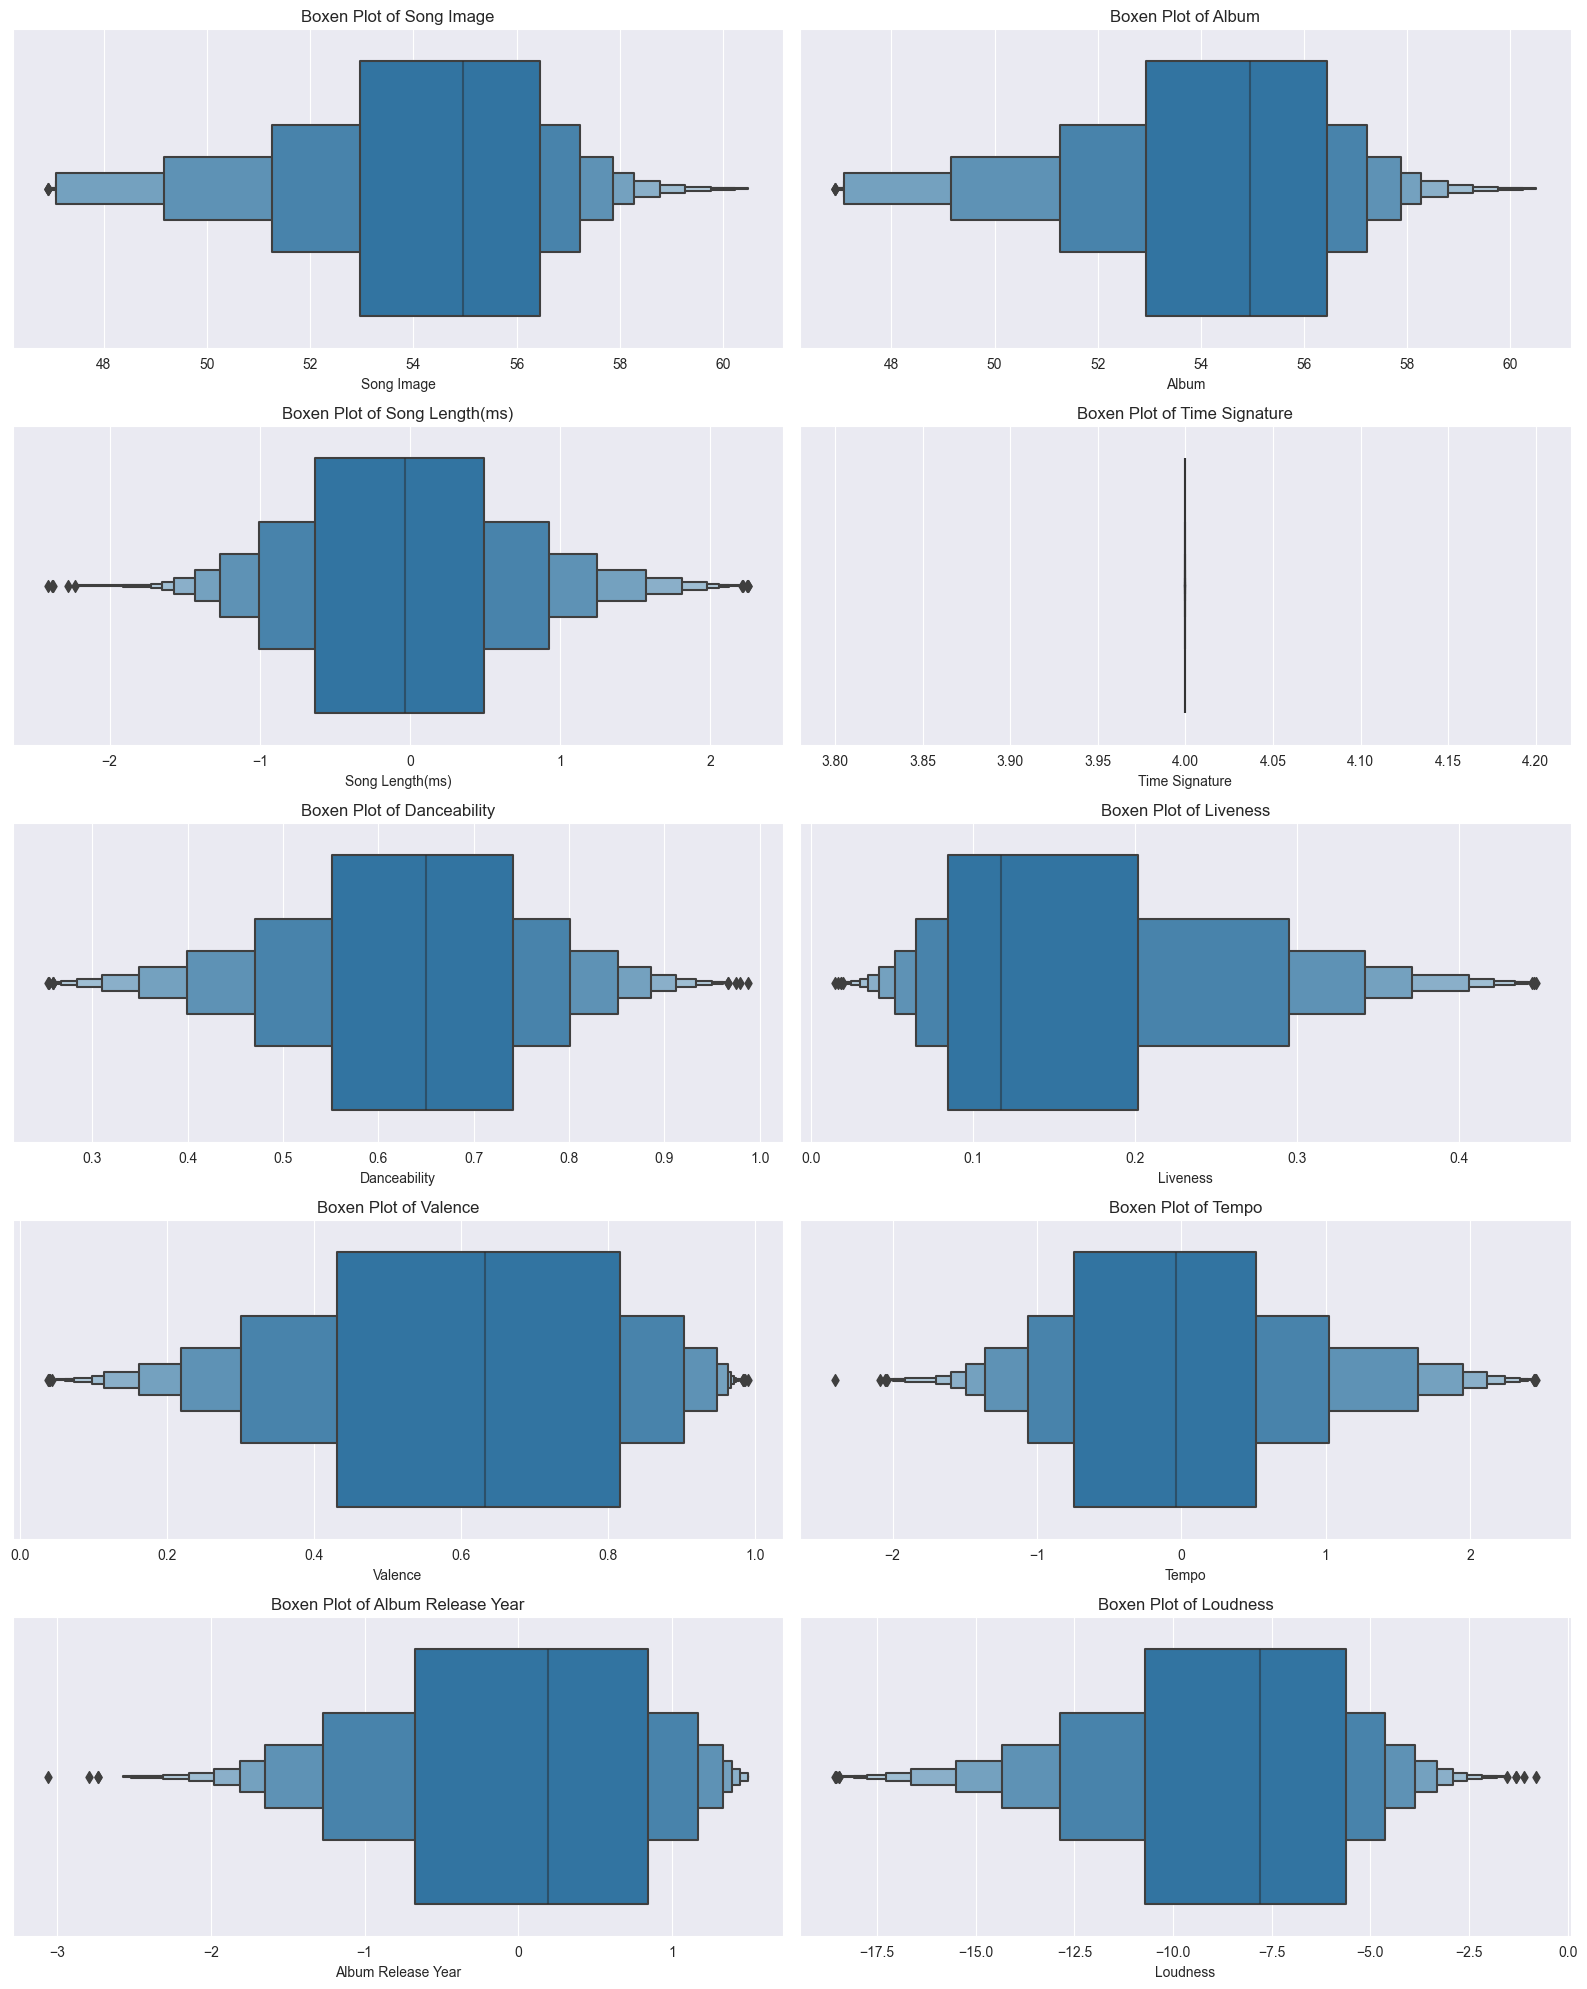

In [250]:
columns = ['Song Image', 'Album', 'Song Length(ms)','Time Signature','Danceability',
           'Liveness','Valence','Tempo','Album Release Year','Loudness']
plot_boxen_plots(cleand_df, columns)

* As we see we removed almost outliers Z-Score.

## Feature selection

#### Notes for me 
* Spotify Link & Spotify URI: These can be dropped as they are unique identifiers and do not directly impact song popularity prediction.

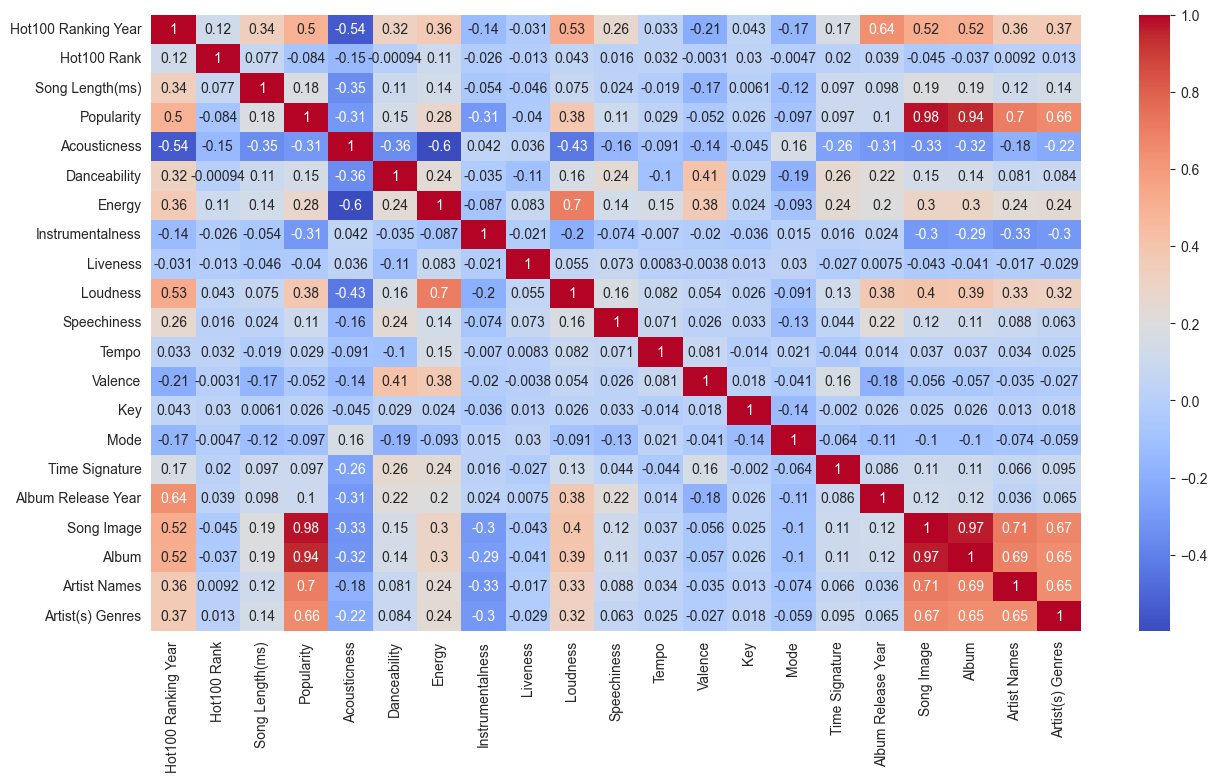

In [251]:
plt.figure(figsize=[15,8])
correlation_matrix = cleand_data.corr()
indices = correlation_matrix.index
sns.heatmap(cleand_data[indices].corr(), annot= True, cmap="coolwarm")
plt.show()
